In [40]:
import seaborn as sns
import pandas as pd
import json

In [41]:
with open('exp_results.json', 'r') as f:
    data = json.load(f)

In [42]:
tuple_data = []
for key in data:
    for value in data[key]:
        tuple_data.append((int(key), float(value)))

In [43]:
data = pd.DataFrame(tuple_data, columns = ['n_procs', 'time(s)'])
data['speedup'] = data.query('n_procs == 1')['time(s)'].mean()/data['time(s)']
data['efficiency'] = data['speedup']/data['n_procs']

Text(0.5, 1.0, 'Execution time vs Processes')

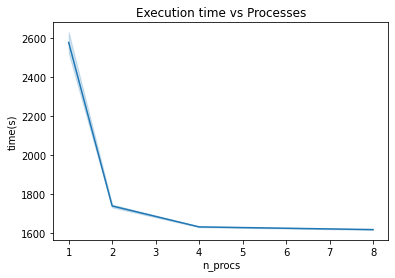

In [47]:
plot = sns.lineplot(x = data['n_procs'], y = data['time(s)'])
plot.set_title('Execution time vs Processes')

Text(0.5, 1.0, 'Efficiency vs Processes')

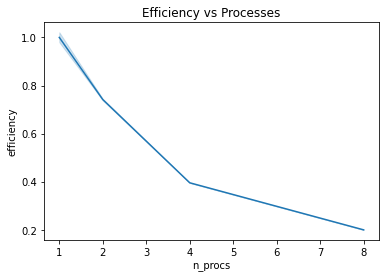

In [48]:
plot = sns.lineplot(x = data['n_procs'], y = data['efficiency'])
plot.set_title('Efficiency vs Processes')

Text(0.5, 1.0, 'Speedup vs Processes')

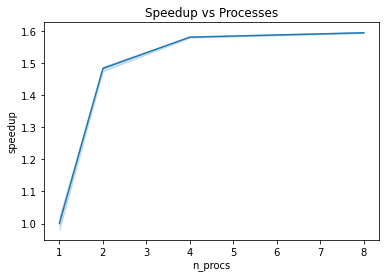

In [50]:
plot = sns.lineplot(x = data['n_procs'], y = data['speedup'])
plot.set_title('Speedup vs Processes')

In [59]:
pd.options.display.float_format = "{:.3f}".format
data.groupby('n_procs').agg(['mean','std'])

time(s)        speedup       efficiency      
            mean    std    mean   std       mean   std
n_procs                                               
1       2579.410 53.722   1.000 0.021      1.000 0.021
2       1738.938 10.889   1.483 0.009      0.742 0.005
4       1631.465  3.904   1.581 0.004      0.395 0.001
8       1617.572  4.098   1.595 0.004      0.199 0.001